/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


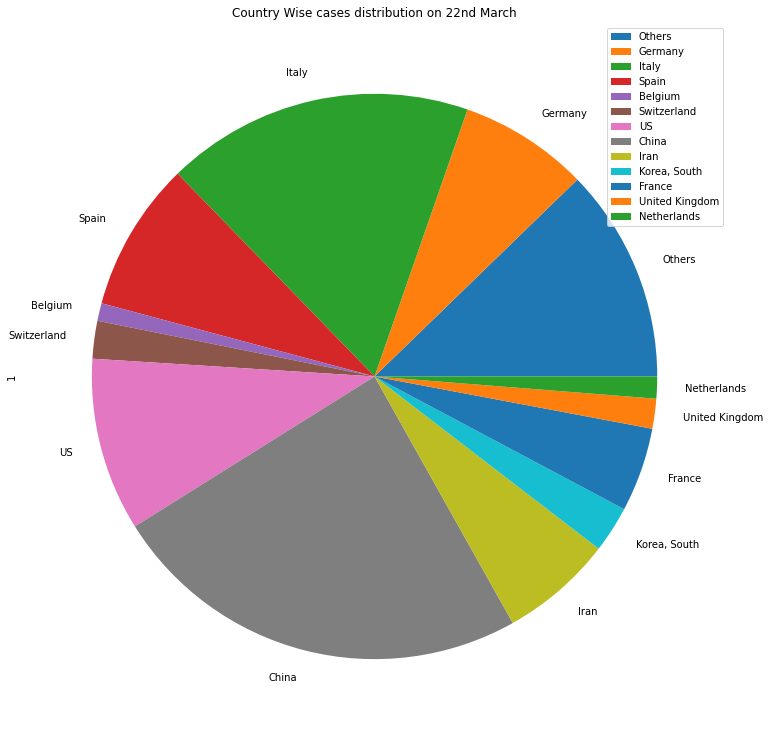

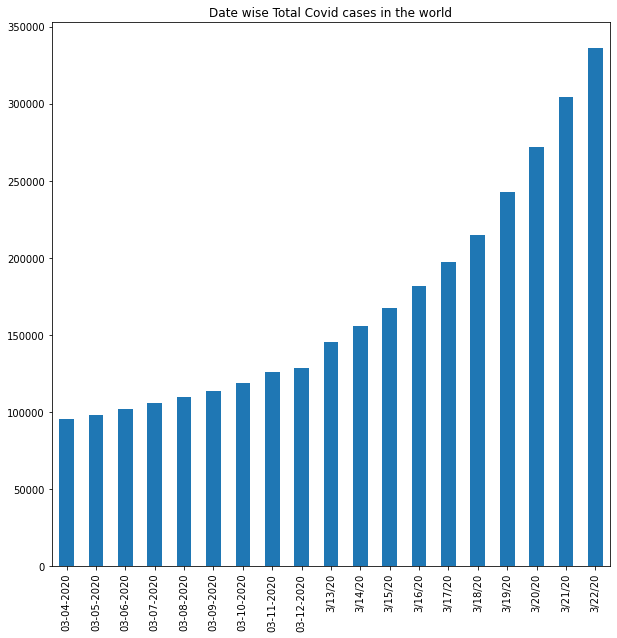

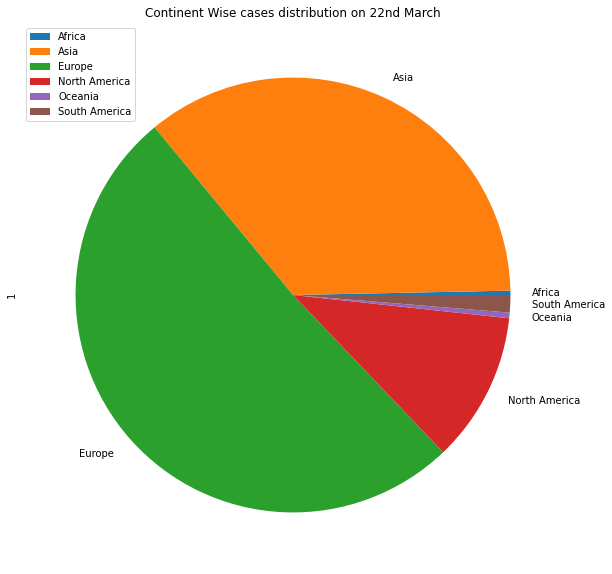

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
df=pd.read_csv('https://raw.githubusercontent.com/ranjith1604/ML_project/master/project1/time_series_2019-ncov-Confirmed.csv')

df=df.drop(columns=['Lat','Long']) #Dropping Lat and Long
count = df.iloc[:,2].value_counts()
#Dropping days when more than 70% of the countries were COVID free
for i in range(2,df.shape[1]):
	count = df.iloc[:,2].value_counts()
	if count[0]/487>0.7:
		df=df.drop(columns=[df.columns.values[2]])
	else:
		break
country=df[['Country/Region','3/22/20']]
unique={} #Dictionary storing unique countries COVID cases
for i in range(0,df.shape[0]):
	if country.iloc[i,0] in unique:
   		unique[country.iloc[i,0]]=unique[country.iloc[i,0]]+country.iloc[i,1]
	else:
    		unique[country.iloc[i,0]]=country.iloc[i,1]
unique2={} #for putting all minor countries cases in OTHERS
unique2['Others']=0
sumval=0
for i in unique: 
        sumval = sumval + unique[i]
for i in unique:
	if (unique[i]/sumval)<=0.01:
		unique2['Others']=unique2['Others']+unique[i]
	else:
		unique2[i]=unique[i]
#COnverting dictionary to dataframe					 
data_items = unique2.items()
data_list = list(data_items)
country = pd.DataFrame(data_list)
country.set_index([0], inplace=True)

plot=country.plot.pie(y=1,legend=None,figsize=(13,13))
plot.legend(loc='upper right')
plt.title('Country Wise cases distribution on 22nd March')
plt.show()
tp=df.sum(axis=0)
tp=tp.iloc[1:tp.shape[0]]
tp.plot.bar(legend=None,figsize=(10,10))
plt.title('Date wise Total Covid cases in the world')
plt.show()

df2=pd.read_csv('https://raw.githubusercontent.com/ranjith1604/ML_project/master/project1/c2c.csv')
tracer={} #to store countries with their continents 
continents={}
for i in range(0,df2.shape[0]):
	tracer[df2.iloc[i,1]]=df2.iloc[i,0]
continents['Africa']=0
continents['Asia']=0
continents['Europe']=0
continents['North America']=0
continents['Oceania']=0
continents['South America']=0
for i in unique:
	if i in tracer:
		continents[tracer[i]]=continents[tracer[i]]+unique[i]
	
data_items = continents.items()
data_list = list(data_items)
continents = pd.DataFrame(data_list)	
continents.set_index([0], inplace=True)		
plot=continents.plot.pie(y=1,legend=None,figsize=(10,10))
plot.legend(loc='upper left')
plt.title('Continent Wise cases distribution on 22nd March')
plt.show()
	
	
		